In [1]:
import numpy as np
import matplotlib.pyplot as plt

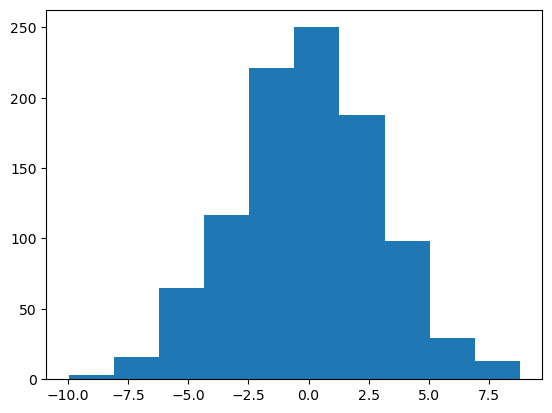

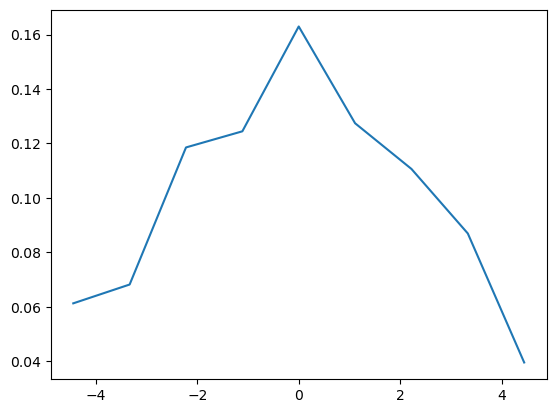

In [2]:
def getNormInitial(mu,std,size):
    return np.random.normal(mu, std, size)

def getDensity(xs, edges):
    return np.histogram(xs, bins=edges, density=True)

mu = 0
std = 3
xs = getNormInitial(mu,std,1000)
xs = np.sort(xs)
rho, edges = getDensity(xs, np.linspace(-5, 5, 10))
plt.hist(xs)
plt.figure()
plt.plot((edges[1:] + edges[:-1])/2, rho)

In [3]:
def getAnalyticalEvoluiton(initState, dt, numTimeStep):
    evolution = np.zeros(shape=(len(initState), numTimeStep))
    evolution[:, 0] = initState
    for tIdx in range(1, numTimeStep):
        if tIdx % 100 == 0: print(tIdx)
        xi = evolution[:, tIdx-1]
        evolution[:, tIdx] = xi*np.exp(dt)*(1-xi*xi+xi*xi*np.exp(2*dt))**(-1/2)
    return evolution

In [4]:
dt, numTimeStep = 0.01, 1000
evolution = getAnalyticalEvoluiton(xs, dt, numTimeStep)

100
200
300
400
500
600
700
800
900


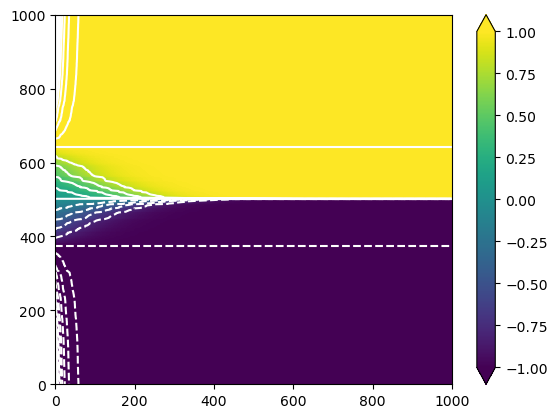

In [5]:
plt.pcolormesh(evolution, vmin=-1, vmax=1)
plt.colorbar(extend='both')
plt.contour(evolution, levels=np.linspace(-10, 10, 101), colors='white')

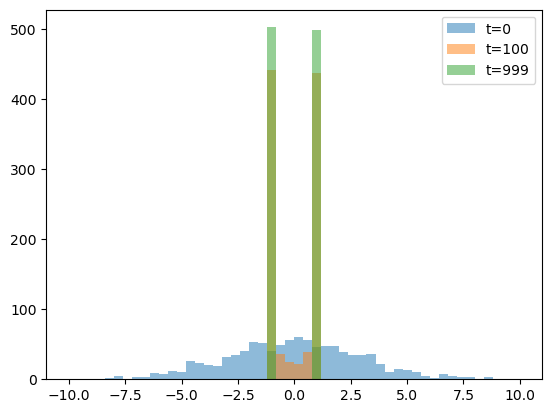

In [22]:
plt.hist(xs, bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=0")
plt.hist(evolution[:,100], bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=100")
plt.hist(evolution[:,-1], bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=999")
plt.legend()

In [8]:
def getNumericalSolution(initState, dt, numTimeStep):
    evolution = np.zeros(shape=(len(initState), numTimeStep))
    evolution[:, 0] = initState
    for tIdx in range(1, numTimeStep):
        if tIdx % 100 == 0: print(tIdx)
        xi = evolution[:, tIdx-1]
        evolution[:, tIdx] = xi + (xi - xi**3) * dt
    return evolution

In [9]:
numEvolution = getNumericalSolution(xs, dt, numTimeStep)

100
200
300
400
500
600
700
800
900


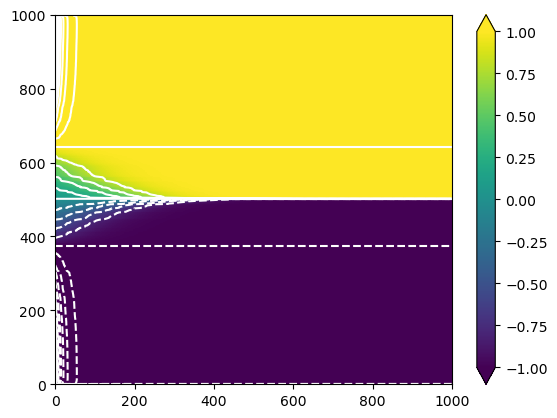

In [10]:
plt.pcolormesh(numEvolution, vmin=-1, vmax=1)
plt.colorbar(extend='both')
plt.contour(numEvolution, levels=np.linspace(-10, 10, 101), colors='white')

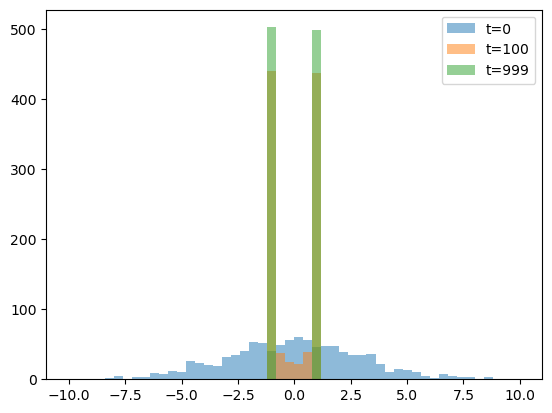

In [23]:
plt.hist(xs, bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=0")
plt.hist(numEvolution[:,100], bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=100")
plt.hist(numEvolution[:,-1], bins=np.linspace(-10, 10, 51), alpha=0.5, label="t=999")
plt.legend()

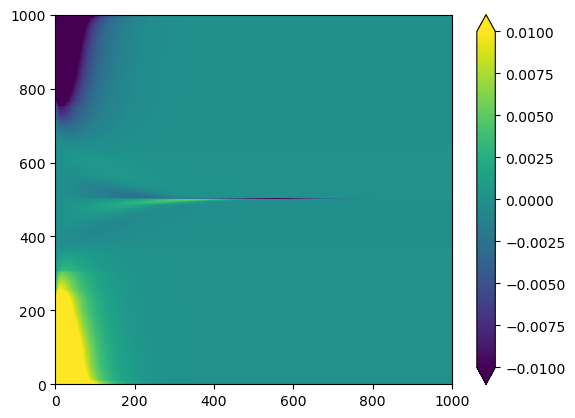

In [11]:
plt.pcolormesh(numEvolution-evolution, vmin=-0.01, vmax=0.01)
plt.colorbar(extend='both')

[1.0057830625, 1.00551275999929, 1.00524805675264, 1.00498894427449, 1.0047354142542402, 1.00448745855625, 1.0042450692198401, 1.0040082384592899, 1.00377695866384, 1.00355122239769, 1.0033310224, 1.00311635158489, 1.00290720304144, 1.00270357003369, 1.00250544600064, 1.0023128245562498, 1.0021256994894399, 1.00194406476409, 1.00176791451904, 1.0015972430680902, 1.0014320449, 1.00127231467849, 1.0011180472422399, 1.00096923760489, 1.0008258809550399, 1.0006879726562499, 1.0005555082470399, 1.00042848344089, 1.0003068941262399, 1.0001907363664901, 1.0000800064000002, 0.99997470064009, 0.99987481567504, 0.9997803482680899, 0.9996912953574401, 0.99960765405625, 0.99952942165264, 0.9994565956096899, 0.99938917356544, 0.99932715333289, 0.9992705329, 0.99921931042969, 0.99917348425984, 0.99913305290329, 0.99909801504784, 0.99906836955625, 0.9990441154662401, 0.99902525199049, 0.99901177851664, 0.99900369460729, 0.999001, 0.99900369460729, 0.99901177851664, 0.99902525199049, 0.999044115466240

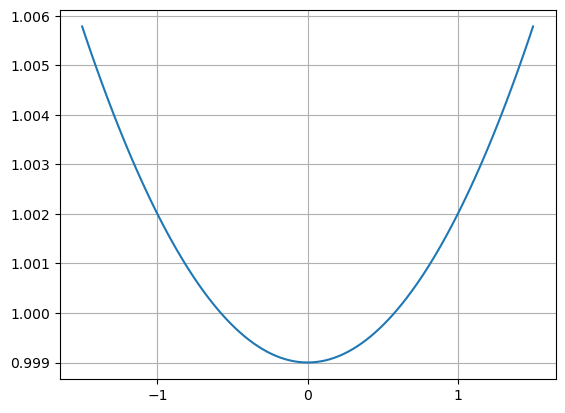

In [79]:
dt = 1e-3
xcoord = np.linspace(-1.5, 1.5, 101)
#jacobian = [x for x in np.linalg.det(np.array(-(1 - 3 * xcoord**2) * dt))]
#jacobian = np.array([[(1 + ((1-3*x**2)*dt + ((1-3*x**2)*dt)**2/2))]] for x in xcoord)
jacobian = [np.linalg.det(np.array([[(1 - ((1-3*x**2)*dt) + ((1-3*x**2)*dt)**2)]])) for x in xcoord]
#jacobian = [np.linalg.det(np.array([[np.exp(-(1 - 3 * (x ** 2)))]])) for x in xcoord]
print(jacobian)
plt.plot(xcoord, jacobian)
plt.xticks([-1, 0, 1])
plt.grid(True)